In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import json
import string
from nltk import FreqDist
import networkx as nx
import scipy

In [3]:

alphabet = list(string.ascii_lowercase)
print(alphabet)

range_ingredients = ["{}".format(i+1) for i in range(0,15)]
ingredient_list = list() 

for k in alphabet:
    link = "http://www.thecocktaildb.com/api/json/v2/1/search.php?f="+k
    r = requests.get(link)
    if r.json()['drinks'] is not None:
        for i in range(len(r.json()['drinks'])):
            drink = r.json()['drinks'][i]
            ingredient_list_V2 = []
            for j in range_ingredients:
                str_1 = "strIngredient"+j
                if drink[str_1] is not None and drink[str_1]!='':
                    ingredient_list_V2.append(drink[str_1].lower())
            ingredient_list.append(ingredient_list_V2)    

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [34]:
cocktail_db_1 = pd.DataFrame({'ingredients':ingredient_list,'position':None})
for i in range(len(cocktail_db_1)):
    cocktail_db_1.loc[i,'position'] = [j+1 for j in range(len(cocktail_db_1.loc[i,'ingredients']))]

In [5]:
#Replace some ingredients to standardize them
rum = ['aÃ±ejo rum','malibu rum','spiced rum','151 proof rum','dark rum','gold rum','coconut rum','rum','blackstrap rum','light rum','white rum']
vodka = ['absolut kurant','cranberry vodka','absolut vodka','absinthe','absolut citron','raspberry vodka','peach vodka','lime vodka','lemon vodka','vodka','absolut peppar']
whiskey = ['tennessee whiskey','blended whiskey','whiskey','rye whiskey','irish whiskey','jack daniels','jim beam','whisky']
vermouth = ['dry vermouth','rosso vermouth','vermouth','sweet vermouth']
brandy = ['brandy','apple brandy','cherry brandy','blackberry brandy','peach brandy','coffee brandy','apricot brandy']
tequila = ['gold tequila','tequila']
lemon = ['lime','lemon','lime juice','lemon-lime soda','lemon juice','lemon peel']
sugar = ['sugar','sugar syrup']
replacement_dict = {'rum':rum, 'vodka':vodka,'whiskey':whiskey,'vermouth':vermouth,'brandy':brandy,'tequila':tequila,'lemon/lime':lemon,'sugar':sugar}

for i in range(len(cocktail_db_1)):
    for j in range(len(cocktail_db_1['ingredients'][i])):
        for k in replacement_dict:
            if cocktail_db_1['ingredients'][i][j] in replacement_dict[k]:
                cocktail_db_1['ingredients'][i][j] = k
    

#Getting all the unique ingredients
ingredients_1 = [] 
for i in range(len(cocktail_db_1)):
    for j in range(len(cocktail_db_1.loc[i,'ingredients'])):
        ingredients_1.append(cocktail_db_1.loc[i,'ingredients'][j])


ingredients_2 = set(ingredients_1)
ingredients_2.remove('sugar')
ingredients_2.remove('ice')

#Getting the positions of the unique ingredients in recipes
ingredient_position = list()

for j in ingredients_2:
    ingredient_position_container = []
    for i in range(len(cocktail_db_1)):
        if j in cocktail_db_1.loc[i,'ingredients']:
            ingredient_position_container.append(cocktail_db_1.loc[i,'position'][cocktail_db_1.loc[i,'ingredients'].index(j)])
        else:
            ingredient_position_container.append(np.NaN)
    ingredient_position.append(ingredient_position_container)

In [33]:
#Making a database for ingredients position
ingredients_db = pd.DataFrame(data = ingredient_position)
ingredients_db_2 = ingredients_db.transpose()
ingredients_db_2.columns = ingredients_2
ingredients_db_3 = ingredients_db_2.corr().melt(ignore_index = False).reset_index(drop = False)
ingredients_db_4 = ingredients_db_3.loc[(ingredients_db_3['value']>0.2) & (ingredients_db_3['value']<1),:].reset_index(drop = True)


In [32]:
#Counting the occurences of each ingredient
freq_1 = FreqDist(ingredients_1).most_common()
occurences_db = pd.DataFrame(dict(freq_1),index = [0]).melt()
occurences_db

ingredients_3 = list(ingredients_db_4['index'])
for i in ingredients_db_4['variable']:
    ingredients_3.append(i)
    
ingredients_4 = list(set(ingredients_3))


#Getting the occurences of the ingredients in correlation index
occurences_db_2 = occurences_db.loc[[occurences_db.loc[occurences_db['variable']==i,:].index[0] for i in ingredients_4],:]


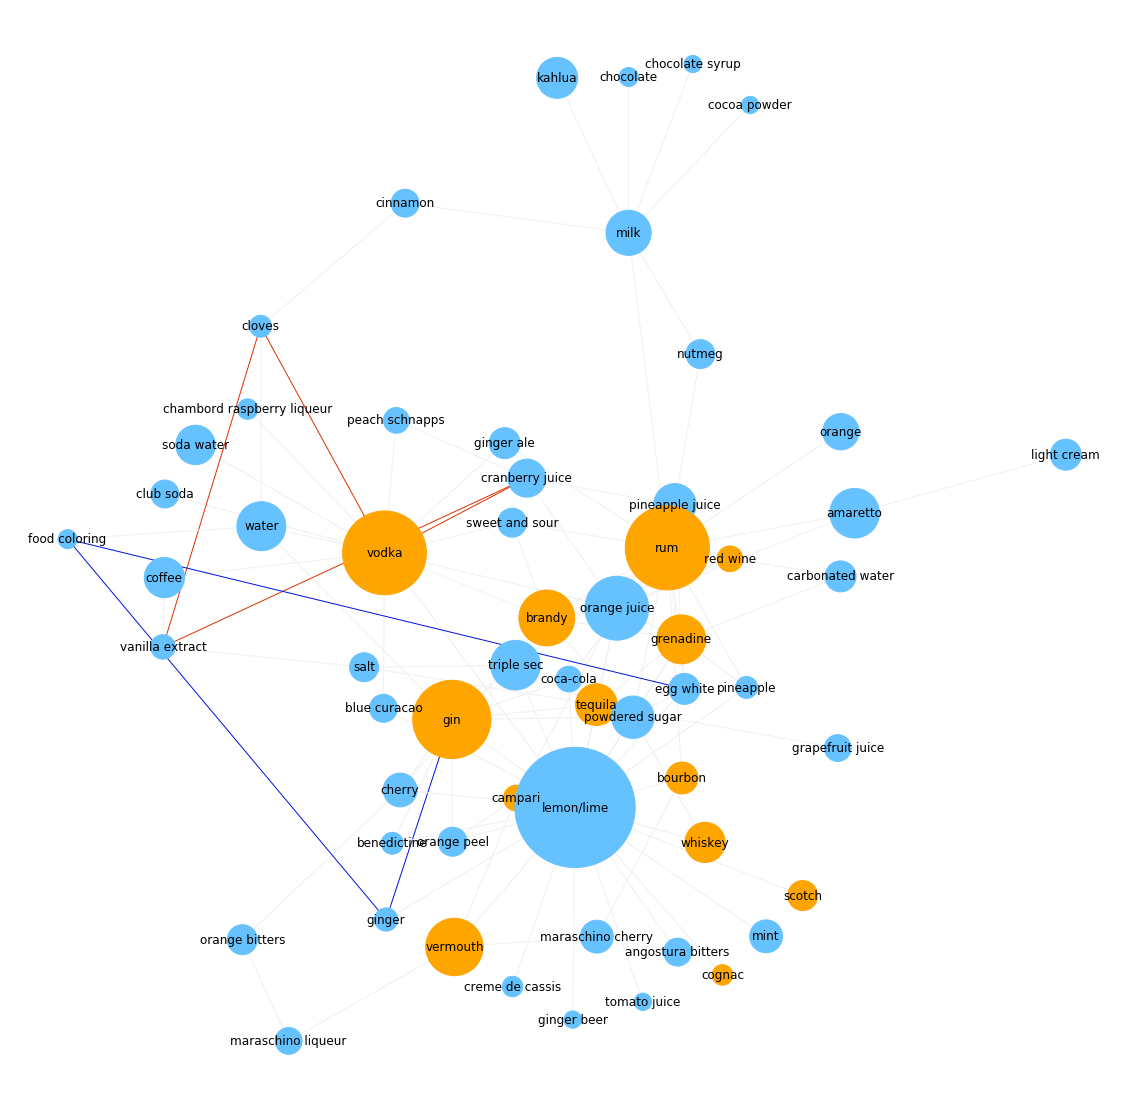

In [31]:
#Making a network out of it
edges = list()
for i in range(len(ingredients_db_4)): 
    edges.append((ingredients_db_4['index'][i],ingredients_db_4['variable'][i],ingredients_db_4['value'][i]+26))

#Bifurcating the ingredients into alcohol and non alcohol
alcohol = ['brandy','rum','tequila','cognac','grenadine','vodka','wine','aÃ±ejo rum','bailey','ricard','whiskey','grain alcohol','champagne','jagermeister','red wine','advocaat','campari','jÃ¤germeister','cointreau','corona','gin','prosecco','scotch','bacardi limon','bourbon','vermouth']
non_alcohol = ['peychaud bitters','strawberry schnapps','hot damn','pineapple syrup','white creme de menthe','milk','cachaca','passoa','ginger beer','cream','agave syrup','chocolate ice-cream','cider','7-up','iced tea','schweppes russchian','coconut liqueur','carbonated soft drink','kiwi','orange curacao','peachtree schnapps','heavy cream','chocolate','triple sec','sherry','mint','peppermint schnapps','pineapple juice','banana liqueur','ginger ale','pisco','grapes','chocolate sauce','blackberries','blended scotch','egg white','anise','butter','berries','celery salt','egg yolk','almond','fresh lime juice','cherry juice','candy','olive brine','elderflower cordial','grape juice','ale','dubonnet rouge','limeade','cloves','water','cloves','cherry liqueur','chambord raspberry liqueur','cornstarch','red chili flakes','kahlua','galliano','erin cream','brown sugar','baileys irish cream','mountain dew','beer','cherries','rosemary syrup','midori melon liqueur','cherry heering','light cream','daiquiri mix','grand marnier','licorice root','curacao','allspice','cinnamon','thyme','marshmallows','maple syrup','powdered sugar','peach schnapps','sugar syrup','fresca','dark creme de cacao','amaretto','grape soda','vanilla ice-cream','bitter lemon','ginger','whipping cream','creme de mure','sherbet','hot chocolate','corn syrup','orange','passion fruit juice','coconut milk','asafoetida','godiva liqueur','banana','tabasco sauce','guinness stout','half-and-half','orange bitters','mezcal','apfelkorn','pineapple','cardamom','blackcurrant squash','kool-aid','whipped cream','maraschino liqueur','bitters','sour mix','cumin seed','tequila','water','yoghurt','chocolate liqueur','figs','egg','basil','ouzo','melon liqueur','lager','salt','falernum','surge','apricot','green chartreuse','vanilla syrup','angostura bitters','wormwood','fruit punch','coriander','soy sauce','pernod','rose','chocolate syrup','cocoa powder','blackcurrant cordial','carbonated water','nutmeg','frangelico','sweet and sour','food coloring','apple juice','kirschwasser','lillet','irish cream','coffee liqueur','jello','guava juice','lemon peel','almond flavoring','cherry grenadine','maui','coconut syrup','islay single malt scotch','crown royal','grapefruit juice','worcestershire sauce','coca-cola','lemon juice','hot sauce','chocolate milk','rosemary','cranberry juice','peach nectar','raspberry syrup','watermelon','orange juice','wild turkey','pisang ambon','johnnie walker','apple cider','port','firewater','drambuie','apple','benedictine','club soda','lemon/lime','olive','goldschlager','condensed milk','peppermint extract','papaya','anis','orgeat syrup','zima','southern comfort','aperol','caramel coloring','applejack','cayenne pepper','tia maria','green creme de menthe','vanilla','raspberry liqueur','blueberries','aquavit','black sambuca','coffee','dr. pepper','lemonade','everclear','carrot','cucumber','passion fruit syrup','vanilla extract','cantaloupe','tea','mini-snickers bars','honey','oreo cookie','ginger syrup','caramel sauce','creme de banane','white wine','sugar','apricot nectar','yukon jack','tonic water','yellow chartreuse','fruit','black pepper','kummel','sambuca','st. germain','lime peel','lime juice cordial','sloe gin','strawberries','salted chocolate','espresso','mango','honey syrup','kiwi liqueur','cream of coconut','blood orange','angelica root','fennel seeds','fruit juice','cherry','demerara sugar','strawberry liqueur','soda water','raisins','sarsaparilla','orange peel','sirup of roses','tropicana','amaro montenegro','maraschino cherry','creme de cassis','hpnotiq','pomegranate juice','sprite','ruby port','glycerine','blue curacao','pepper','pink lemonade','anisette','orange spiral','tomato juice','mint syrup','pina colada mix','fresh lemon juice','peach bitters','apple schnapps','ice','butterscotch schnapps','lillet blanc','lavender','root beer','creme de cacao','pepsi cola','marjoram leaves','cranberries']
non_alcohol.pop(non_alcohol.index('tequila'))

#Setting a color map for nodes
alcohol_dict = {'orange':alcohol,'#66c2ff':non_alcohol}
color_map = []

for i in ingredients_4:
    for j in alcohol_dict:
        if i in alcohol_dict[j]:
            color_map.append(j)
            
#Network graph
fig, ax = plt.subplots(figsize=(20, 20))
ad_1 = nx.Graph()

#Adding the nodes and edges
ad_1.add_nodes_from(ingredients_4)
ad_1.add_weighted_edges_from(edges)
ad_1.add_weighted_edges_from(cocktail_1_2[-3:])
ad_1.add_weighted_edges_from(cocktail_2_2[-3:])
seed = [14,18]
position = nx.spring_layout(ad_1,seed = 22)
node_size = [occurences_db_2['value']*60]

#Drawing and displaying the graph
nx.draw(ad_1, pos = position, node_color = color_map,node_size = node_size,edge_color = color_map_edges,labels = dict([(i,i) for i in ingredients_4]))
plt.savefig("network_2.png")

In [12]:
#Now lets make cocktails
def get_ingredient_corr(name):
    ingredients_db_5 = ingredients_db_4.loc[ingredients_db_4['index']==name,:].sort_values(by = 'value',ascending = False).reset_index(drop = True)
    return(ingredients_db_5.loc[ingredients_db_5['value']>0.1,:])

def make_cocktail(name, number):
    ingredients_6 = list()
    ingredients_6.append(name)
    len_counter = len(ingredients_6)
    while len_counter<number:
        next_ingredient = str(get_ingredient_corr(name).loc[int(np.random.randint(len(get_ingredient_corr(name)),size = 1)),'variable'])         
        other_ingredient = get_ingredient_corr(next_ingredient).loc[int(np.random.randint(len(get_ingredient_corr(next_ingredient)),size = 1)),'variable']
        if other_ingredient not in ingredients_6 and other_ingredient not in alcohol:
            ingredients_6.append(other_ingredient)
            len_counter += 1
    return ingredients_6

['vodka', 'vanilla extract', 'sweet and sour', 'peach schnapps']

In [19]:
#Make random cocktails
cocktails = ['vodka','rum','gin']
cocktails_db = list()
for i in cocktails:
    counter = 0
    while counter <=100:
        cocktails_db.append(make_cocktail(i,4))
        counter+=1

In [9]:
def highlight_cocktail(cocktail_ingredients):
    cocktail_1 = cocktail_ingredients
    edge_list_2 = list()
    edge_list_3 = list()
    for i in range(len(cocktail_1)):
        edge_list_2.append((cocktail_1[i-1],cocktail_1[i],0.9))
    for i in range(len(cocktail_1)):
        for j in range(len(cocktail_1)):
            edge_list_3.append((cocktail_1[i],cocktail_1[j]))
    return edge_list_3,edge_list_2

In [10]:
#Get edge data
cocktail_1_1,cocktail_1_2 = highlight_cocktail(['vodka','cloves','vanilla extract','cranberry juice'])
cocktail_2_1,cocktail_2_2 = highlight_cocktail(['gin','ginger','food coloring','egg white'])

In [35]:
#Set up color map for the edges
color_map_edges = []
for i in list(ad_1.edges):
    if i in cocktail_1_1:
        color_map_edges.append("#DA3403")
    elif i in cocktail_2_1:
        color_map_edges.append("#0414DC")
    else:
        color_map_edges.append("#F0F0F0")